In [72]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd


In [73]:
PROJECT_ROOT = Path.cwd().parent
CKPT_ROOT = PROJECT_ROOT / "checkpoints"
BLIP_20E_R8 = CKPT_ROOT / "blip_lora_20e_bs64_r8_a100"
BLIP_50E_R8 = CKPT_ROOT / "blip_lora_50e_bs96_r8_h100"
BLIP_50E_R16 = CKPT_ROOT / "blip_lora_50e_bs96_r16_h100"
BLIP_50E_R32 = CKPT_ROOT / "blip_lora_50e_bs96_r32_h100"


In [74]:
def load_json(path: Path) -> dict:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def results_to_df(results: dict, model_name: str) -> pd.DataFrame:
    rows = []
    for subset, metrics in results.items():
        row = {"model": model_name, "subset": subset.upper()}
        row.update(metrics)
        rows.append(row)
    df = pd.DataFrame(rows)
    for col in df.columns:
        if col not in ["model", "subset"]:
            df[col] = df[col].astype(float)
    return df

In [75]:
blip_logs = {
    "BLIP LoRA 20e r8": {
        "results": results_to_df(
            load_json(BLIP_20E_R8 / "test_results.json"),
            model_name="BLIP LoRA 20e r8",
        ),
        "history": load_json(BLIP_20E_R8 / "history.json"),
    },
    "BLIP LoRA 50e r8": {
        "results": results_to_df(
            load_json(BLIP_50E_R8 / "test_results.json"),
            model_name="BLIP LoRA 50e r8",
        ),
        "history": load_json(BLIP_50E_R8 / "history.json"),
    },
    "BLIP LoRA 50e r16": {
        "results": results_to_df(
            load_json(BLIP_50E_R16 / "test_results.json"),
            model_name="BLIP LoRA 50e r16",
        ),
        "history": load_json(BLIP_50E_R16 / "history.json"),
    },
    "BLIP LoRA 50e r32": {
        "results": results_to_df(
            load_json(BLIP_50E_R32 / "test_results.json"),
            model_name="BLIP LoRA 50e r32",
        ),
        "history": load_json(BLIP_50E_R32 / "history.json"),
    },
}


In [76]:
df_compare = pd.concat(
    [blip_logs[model]["results"] for model in blip_logs.keys()],
    ignore_index=True,
)
df_compare

,model,subset,exact_match,token_f1,bleu,rougeL,bertscore_precision,bertscore_recall,bertscore_f1
0,BLIP LoRA 20e r8,OVERALL,0.692743,0.736373,NaN,NaN,NaN,NaN,NaN
1,BLIP LoRA 20e r8,OPEN,0.620155,0.691925,0.031115,0.725931,0.919364,0.913635,0.916225
2,BLIP LoRA 20e r8,CLOSED,0.805288,0.805288,NaN,NaN,NaN,NaN,NaN
3,BLIP LoRA 50e r8,OVERALL,0.717248,0.765696,NaN,NaN,NaN,NaN,NaN
4,BLIP LoRA 50e r8,OPEN,0.641860,0.721556,0.047758,0.751538,0.937169,0.934734,0.935723
5,BLIP LoRA 50e r8,CLOSED,0.834135,0.834135,NaN,NaN,NaN,NaN,NaN
6,BLIP LoRA 50e r16,OVERALL,0.718190,0.766929,NaN,NaN,NaN,NaN,NaN
7,BLIP LoRA 50e r16,OPEN,0.643411,0.723584,0.053811,0.756832,0.936424,0.934777,0.935321
8,BLIP LoRA 50e r16,CLOSED,0.834135,0.834135,NaN,NaN,NaN,NaN,NaN
9,BLIP LoRA 50e r32,OVERALL,0.715363,0.771709,NaN,NaN,NaN,NaN,NaN


In [77]:
df_compare.loc[df_compare["subset"] == "OVERALL"].sort_values(
    by="token_f1", ascending=False
)
# interpret: longer epoch helps token_f1, larger r helps token_f1

,model,subset,exact_match,token_f1,bleu,rougeL,bertscore_precision,bertscore_recall,bertscore_f1
9,BLIP LoRA 50e r32,OVERALL,0.715363,0.771709,NaN,NaN,NaN,NaN,NaN
6,BLIP LoRA 50e r16,OVERALL,0.718190,0.766929,NaN,NaN,NaN,NaN,NaN
3,BLIP LoRA 50e r8,OVERALL,0.717248,0.765696,NaN,NaN,NaN,NaN,NaN
0,BLIP LoRA 20e r8,OVERALL,0.692743,0.736373,NaN,NaN,NaN,NaN,NaN


In [78]:
df_compare.loc[df_compare["subset"] == "OPEN"].sort_values(
    by="token_f1", ascending=False
)
# interpret: longer epoch helps token_f1, larger r helps token_f1

,model,subset,exact_match,token_f1,bleu,rougeL,bertscore_precision,bertscore_recall,bertscore_f1
10,BLIP LoRA 50e r32,OPEN,0.640310,0.732997,0.054720,0.763659,0.937514,0.937164,0.937013
7,BLIP LoRA 50e r16,OPEN,0.643411,0.723584,0.053811,0.756832,0.936424,0.934777,0.935321
4,BLIP LoRA 50e r8,OPEN,0.641860,0.721556,0.047758,0.751538,0.937169,0.934734,0.935723
1,BLIP LoRA 20e r8,OPEN,0.620155,0.691925,0.031115,0.725931,0.919364,0.913635,0.916225


In [79]:
df_compare.loc[df_compare["subset"] == "CLOSED"].sort_values(
    by="token_f1", ascending=False
)
# interpret: longer epoch helps token_f1, but since token_f1 seems to be already plateauing, larger r does not help as much here

,model,subset,exact_match,token_f1,bleu,rougeL,bertscore_precision,bertscore_recall,bertscore_f1
5,BLIP LoRA 50e r8,CLOSED,0.834135,0.834135,NaN,NaN,NaN,NaN,NaN
8,BLIP LoRA 50e r16,CLOSED,0.834135,0.834135,NaN,NaN,NaN,NaN,NaN
11,BLIP LoRA 50e r32,CLOSED,0.831731,0.831731,NaN,NaN,NaN,NaN,NaN
2,BLIP LoRA 20e r8,CLOSED,0.805288,0.805288,NaN,NaN,NaN,NaN,NaN


In [80]:
# Join them together for plotting, rename train_loss, val_loss, val_exact_match, val_token_f1 to have model name prefixes
history_r8_combined = {}
for model_name in ["BLIP LoRA 20e r8", "BLIP LoRA 50e r8"]:
    history = blip_logs[model_name]["history"]
    for key, values in history.items():
        new_key = f"{model_name}/{key}"
        history_r8_combined[new_key] = values


In [81]:
# Dotted line for val_*, solid line for train_*
# same color for same prefix model name
def plot_history(history: dict[str, list[float]], title: str = "Training History"):
    """
    Plots training history with 2 subplots:
      (1) Loss curves
      (2) Metric curves (everything else)
    """
    if history is None or len(history) == 0:
        print("No history to plot.")
        return

    # Define colors for each model prefix, randomize the colors to avoid similar colors being adjacent
    model_prefixes = set(k.split("/")[0] for k in history.keys())
    colors = plt.get_cmap("Set1", len(model_prefixes))
    prefix_to_color = {prefix: colors(i) for i, prefix in enumerate(model_prefixes)}

    loss_keys = [k for k in history.keys() if "loss" in k.lower()]
    metric_keys = [k for k in history.keys() if k not in loss_keys]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(title, fontsize=14)

    # ---- Loss subplot ----
    ax0 = axes[0]
    if len(loss_keys) == 0:
        ax0.text(0.5, 0.5, "No loss keys found", ha="center", va="center")
    else:
        for k in loss_keys:
            prefix = k.split("/")[0]
            ax0.plot(
                history[k],
                label=k,
                color=prefix_to_color[prefix],
                linestyle="--" if "val" in k.lower() else "-",
            )
        ax0.set_title("Loss")
        ax0.set_xlabel("Epoch")
        ax0.set_ylabel("Loss")
        ax0.grid(True)
        ax0.legend()

    # ---- Metric subplot ----
    # dotted line for exact_match, solid line for token_f1
    ax1 = axes[1]
    if len(metric_keys) == 0:
        ax1.text(0.5, 0.5, "No metric keys found", ha="center", va="center")
    else:
        for k in metric_keys:
            prefix = k.split("/")[0]
            ax1.plot(
                history[k],
                label=k,
                color=prefix_to_color[prefix],
                linestyle="--" if "exact_match" in k.lower() else "-",
            )
        ax1.set_title("Metrics")
        ax1.set_xlabel("Epoch")
        ax1.set_ylabel("Score")
        ax1.grid(True)
        ax1.legend()

    plt.tight_layout()


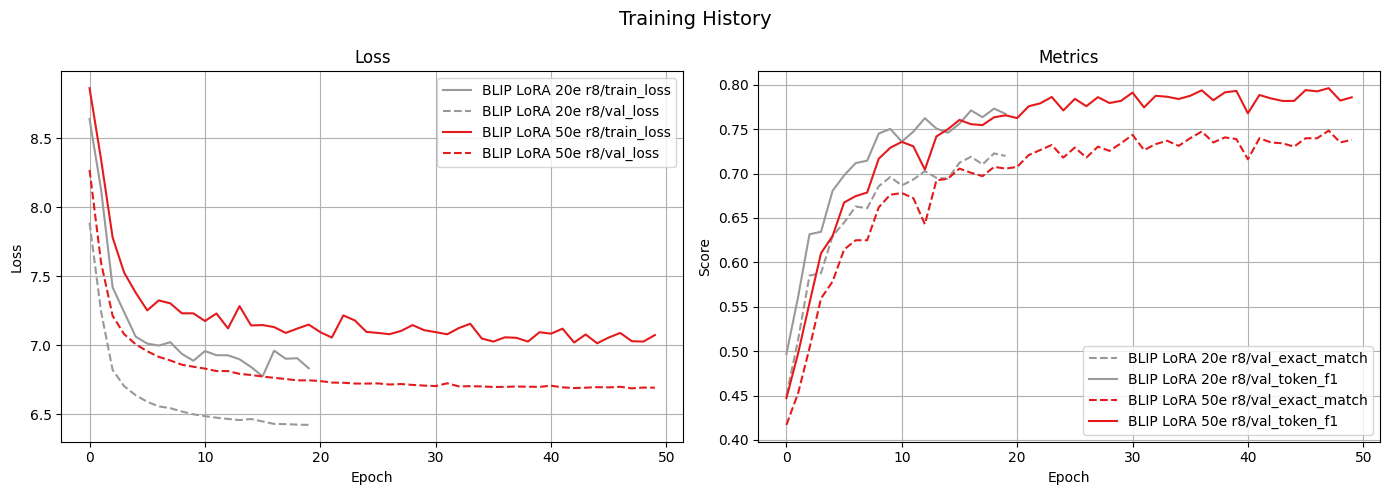

In [82]:
plot_history(history_r8_combined)
plt.show()
# Bad comparison, i used a different batch size and hardware for the 20e r8 model

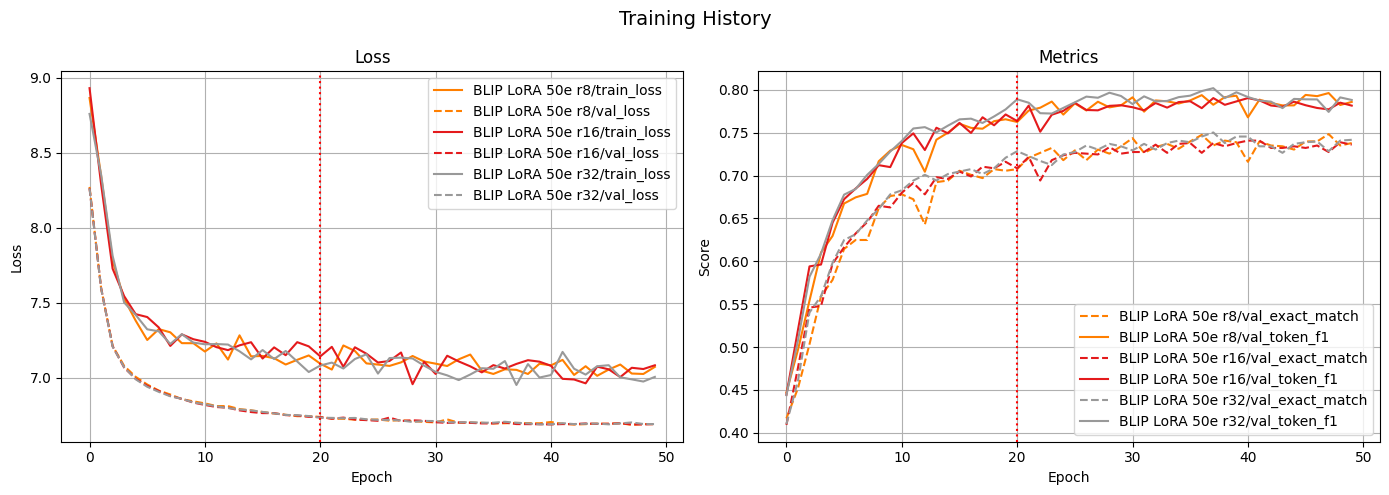

In [83]:
history_50e_combined = {}
for model_name in ["BLIP LoRA 50e r8", "BLIP LoRA 50e r16", "BLIP LoRA 50e r32"]:
    history = blip_logs[model_name]["history"]
    for key, values in history.items():
        new_key = f"{model_name}/{key}"
        history_50e_combined[new_key] = values
plot_history(history_50e_combined)
# Draw vertical red dotted line at epoch 20, for first plot, and second plot, plt.get_figs()[0] doesn't work
plt.gcf().axes[0].axvline(x=20, color="red", linestyle=":")
plt.gcf().axes[1].axvline(x=20, color="red", linestyle=":")
plt.show()